# 📊 Daily Challenge: Interactive Data Visualization
**US Superstore Dataset**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload file
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load dataset
df = pd.read_excel(file_name)

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


Saving US_Superstore_data.xls to US_Superstore_data.xls
✅ Dataset loaded successfully!
Shape: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Drop duplicates
df = df.drop_duplicates()

print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


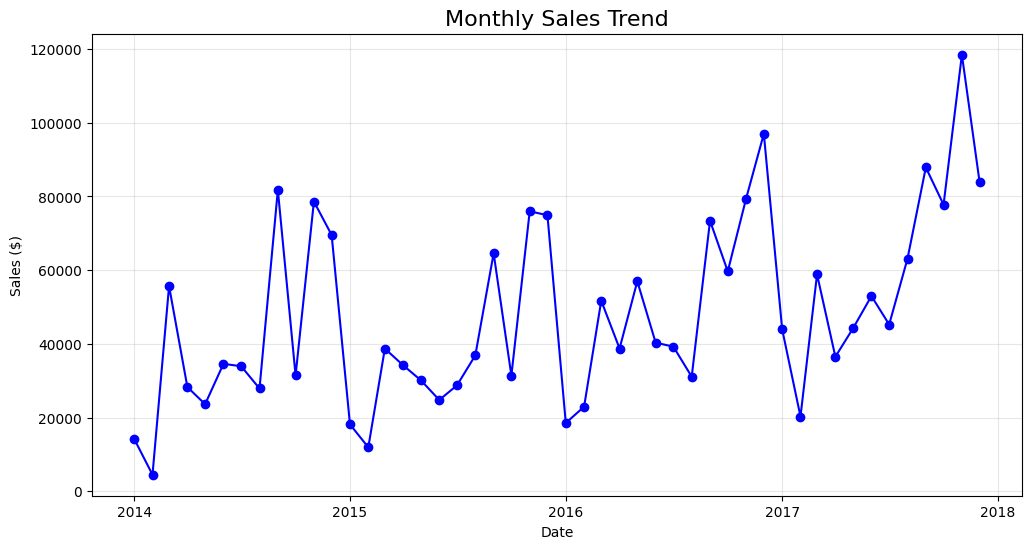

In [3]:
import matplotlib.dates as mdates

# Sales per month
monthly_sales = df.groupby(df['Order Date'].dt.to_period("M"))['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

# Interactive plot
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='blue')
ax.set_title("Monthly Sales Trend", fontsize=16)
ax.set_xlabel("Date")
ax.set_ylabel("Sales ($)")
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.grid(True, alpha=0.3)
plt.show()


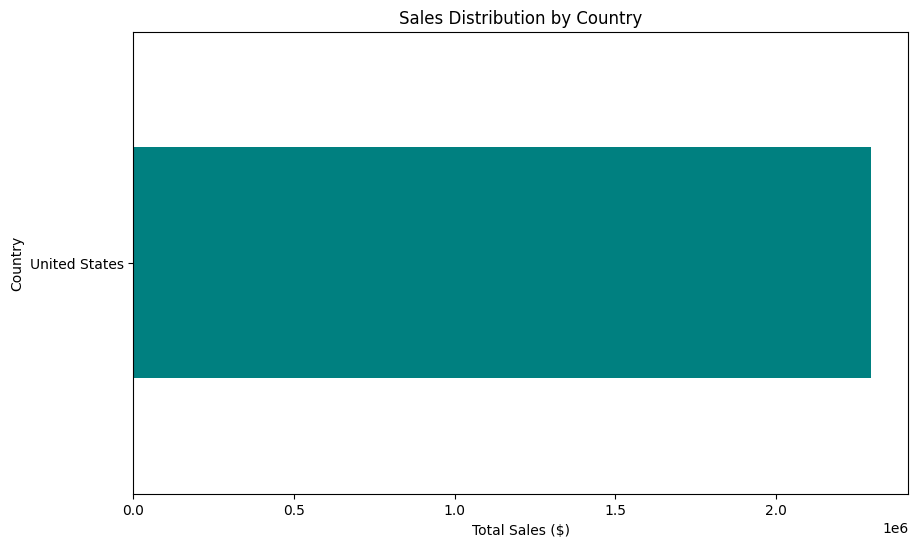

In [4]:
# Sales by country
country_sales = df.groupby("Country")["Sales"].sum().sort_values()

plt.figure(figsize=(10,6))
country_sales.plot(kind="barh", color="teal")
plt.title("Sales Distribution by Country")
plt.xlabel("Total Sales ($)")
plt.show()


/tmp/ipython-input-2333678816.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette="Blues_d")


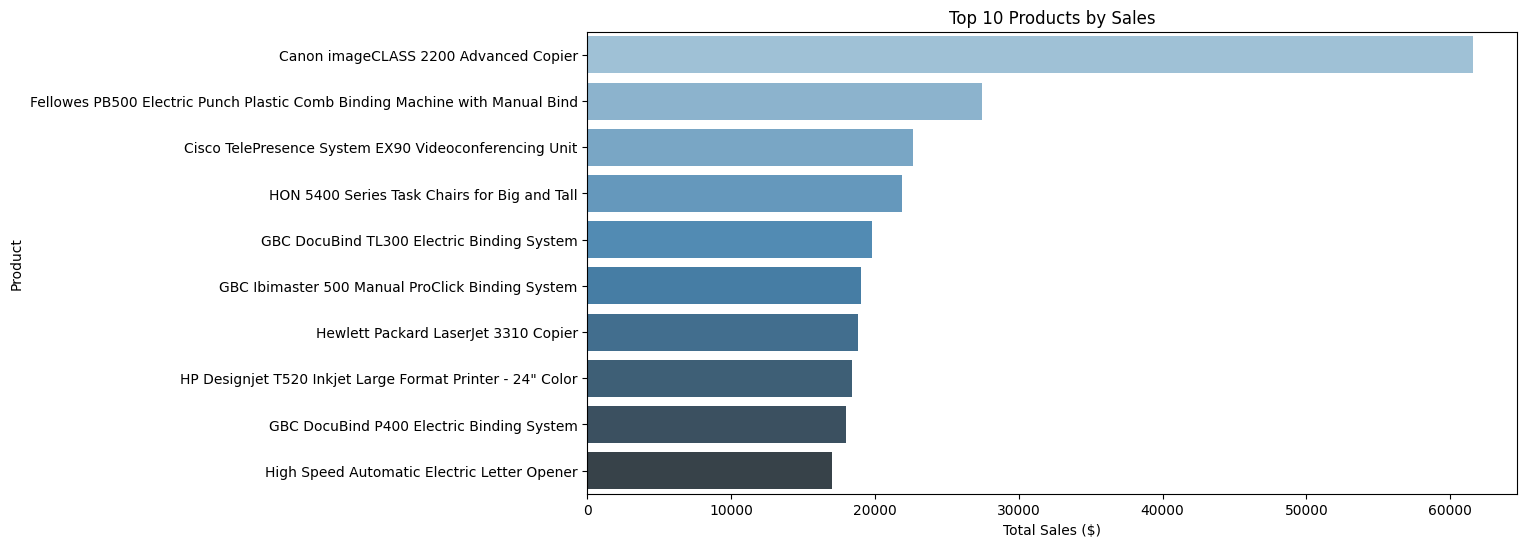

In [5]:
product_sales = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=product_sales.values, y=product_sales.index, palette="Blues_d")
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product")
plt.show()


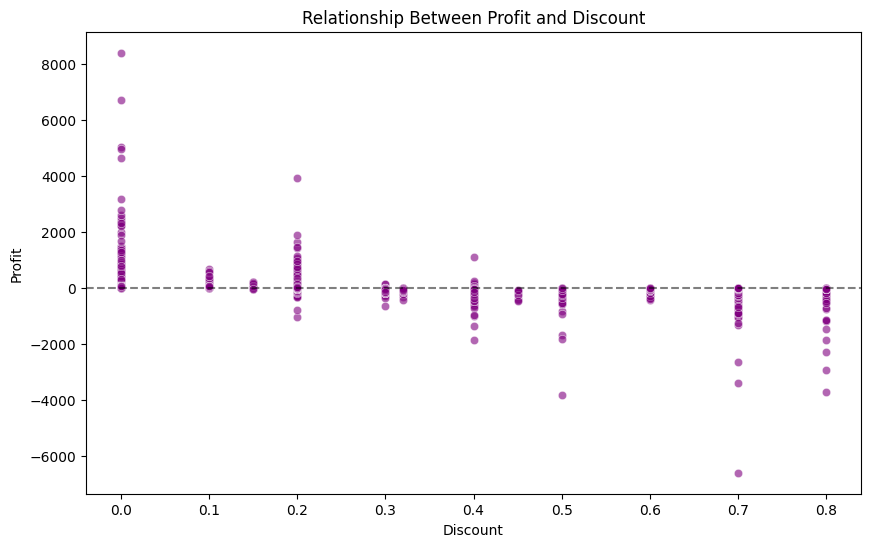

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Discount", y="Profit", alpha=0.6, color="purple")
plt.title("Relationship Between Profit and Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.axhline(y=0, color="black", linestyle="--", alpha=0.5)
plt.show()


# 🔎 Comparative Analysis

- **Matplotlib**: Great for fine control, interactive time-series plots, and customization.  
- **Seaborn**: Faster, cleaner for categorical data and relationships. Built-in aesthetics.  
- **Insight**:  
  - Sales show seasonality (peaks at year end).  
  - Discount heavily impacts profit → high discounts often cause losses.  
  - A few products dominate sales.  
  - Country analysis shows concentration (mostly US if dataset is standard).  
